In [16]:
import data_loader
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import json
import data_analysis.plotting as dplt
import data_analysis.utils as da
from torch.utils.data import DataLoader
import estimation
import os

In [2]:
with open('config.json','r') as fl:
    config = json.load(fl)

In [3]:
data = data_loader.DataLoader(config=config["paths"]["dataset"])

In [14]:
data[1]

{'path': 'data\\train\\F_Con\\wav_arrayMic_FC01S01\\wav_arrayMic_FC01S01_0002.wav',
 'label': 0,
 'type': 'arrayMic',
 'Id': 'FC01S01',
 'audio': tensor([ 0.0269,  0.0341,  0.0092,  ...,  0.0008, -0.0010, -0.0003],
        dtype=torch.float64),
 'sampling_rate': 16000}

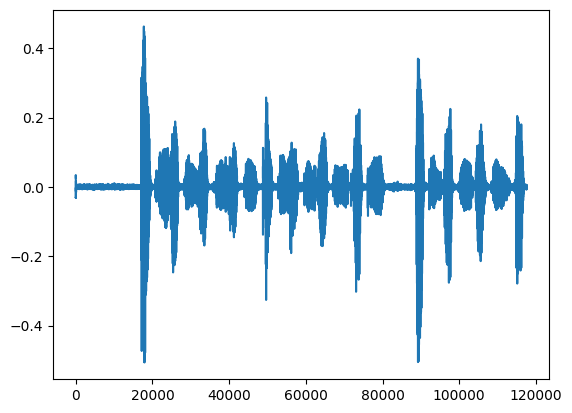

In [13]:
plt.plot(data[1]["audio"])

In [4]:
all_len,class_len,linear= da.get_length_distribution_multi_thread(data,max_workers=10)


collecting data: 100%|██████████| 14106/14106 [00:00<00:00, 61973.04it/s]


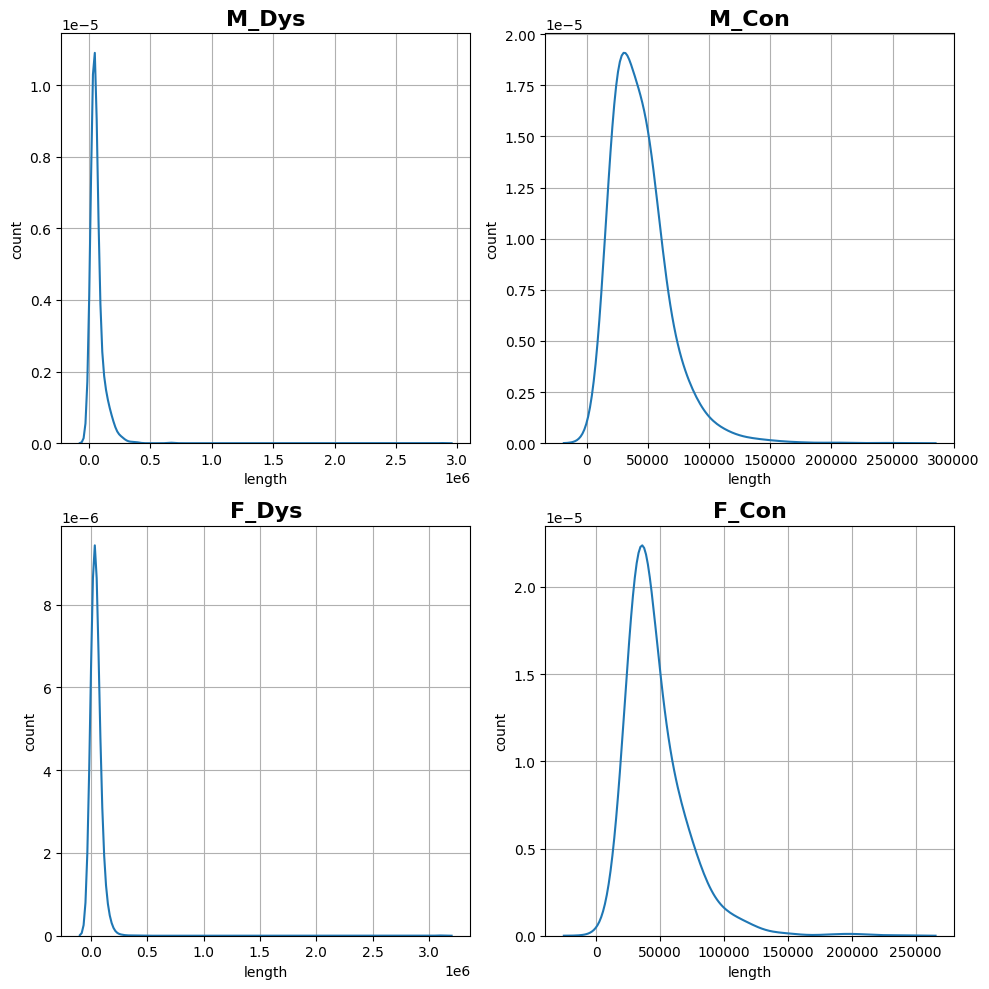

In [10]:
dplt.plot_distribution_per_class(class_len,2,2,(10,10),
                                'length',"count",{0:"F_Con",1:"F_Dys",2:"M_Con",3:"M_Dys"},
                                grid=True,plot_type='kde')

In [6]:
import os

num_cores = os.cpu_count()

In [7]:
num_cores

16

In [8]:
import time
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
from collections import defaultdict

def process_item(item):
    length = item['audio'].shape[0]
    label = item['label']
    return length, label

def get_length_distribution(dataset, max_workers):
    length_distribution_per_label = defaultdict(lambda: defaultdict(int))
    all_lengths = defaultdict(int)

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_item = {executor.submit(process_item, item): item for item in dataset}

        for future in tqdm(as_completed(future_to_item), total=len(dataset), desc="collecting data"):
            try:
                length, label = future.result()
                length_distribution_per_label[label][length] += 1
                all_lengths[length] += 1
            except Exception as exc:
                print(f'Generated an exception: {exc}')

    return all_lengths, length_distribution_per_label

def measure_execution_time(dataset, max_workers):
    start_time = time.time()
    get_length_distribution(dataset, max_workers)
    end_time = time.time()
    return end_time - start_time

# Example dataset (mocked for demonstration purposes)
dataset = [{'audio': np.random.rand(16000), 'label': 'A'} for _ in range(1000)]

# Test different numbers of workers
worker_counts = range(1, 21)  # Test from 1 to 20 workers
execution_times = []

for workers in worker_counts:
    execution_time = measure_execution_time(dataset, workers)
    execution_times.append((workers, execution_time))
    print(f'Workers: {workers}, Execution Time: {execution_time:.2f} seconds')

# Find the optimal number of workers
optimal_workers = min(execution_times, key=lambda x: x[1])[0]
print(f'Optimal number of workers: {optimal_workers}')






collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 200033.57it/s]


Workers: 1, Execution Time: 0.03 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 333013.42it/s]


Workers: 2, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 249958.52it/s]


Workers: 3, Execution Time: 0.52 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 333013.42it/s]


Workers: 4, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 333410.49it/s]


Workers: 5, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 250003.22it/s]


Workers: 6, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 330963.78it/s]


Workers: 7, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 250047.93it/s]


Workers: 8, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 220335.36it/s]


Workers: 9, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 250003.22it/s]


Workers: 10, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 500095.86it/s]


Workers: 11, Execution Time: 0.11 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 331801.60it/s]


Workers: 12, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 331198.99it/s]


Workers: 13, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 498550.34it/s]


Workers: 14, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 285074.70it/s]


Workers: 15, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 333755.39it/s]


Workers: 16, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 199852.48it/s]

Workers: 17, Execution Time: 0.11 seconds



collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 335302.90it/s]


Workers: 18, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 500036.24it/s]


Workers: 19, Execution Time: 0.02 seconds


collecting data: 100%|██████████| 1000/1000 [00:00<00:00, 333331.00it/s]

Workers: 20, Execution Time: 0.03 seconds
Optimal number of workers: 14


In [20]:
root = r'torgo'
classes = [os.path.join(root,i) for i in os.listdir(root)]
people = [os.path.join(i,j) for i in classes for j in os.listdir(i)]
sessions = [os.path.join(i,j) for i in people for j in os.listdir(i) if "S" in j]

In [23]:
promptsFolder = [os.path.join(i,"prompts") for i in sessions]
audioFolder = [os.path.join(i,"wav_arrayMic") for i in sessions]

In [38]:
from collections import defaultdict
from tqdm import tqdm
dic = defaultdict(lambda: defaultdict(int))

In [39]:
for i in promptsFolder:
    types = i.split('\\')[1]
    for j in tqdm(os.listdir(i),total=len(os.listdir(i)),desc=f"loading {i}"):
        file = os.path.join(i,j)
        with open(file,"r") as fl:
            dic[types][fl.read().strip()] += 1

loading torgo\MC\MC04\Session2\prompts: 100%|██████████| 373/373 [00:00<00:00, 6531.55it/s]


In [43]:
data = []

In [45]:
for i in tqdm(dic['F'].keys(),total=len(dic['F'])*len(dic['FC']),desc='processing'):
    for j in dic['FC'].keys():
        if i == j:
            data.append(f"word - {i} FC - {dic['FC'][j]} F - {dic['F'][i]}")
            break

processing:   0%|          | 490/460600 [00:00<00:12, 37700.57it/s]


In [46]:
data

['word - [relax your mouth in its normal position] FC - 24 F - 12',
 'word - stick FC - 3 F - 3',
 'word - Except in the winter when the ooze or snow or ice prevents, FC - 3 F - 4',
 'word - pat FC - 12 F - 5',
 'word - up FC - 5 F - 4',
 'word - meat FC - 11 F - 5',
 'word - know FC - 7 F - 5',
 'word - he slowly takes a short walk in the open air each day. FC - 3 F - 3',
 'word - air FC - 13 F - 8',
 'word - swarm FC - 8 F - 6',
 'word - double FC - 3 F - 3',
 'word - no FC - 11 F - 9',
 'word - storm FC - 7 F - 7',
 'word - dug FC - 7 F - 3',
 'word - You wished to know all about my grandfather. FC - 3 F - 3',
 'word - knee FC - 3 F - 3',
 'word - feet FC - 12 F - 6',
 'word - train FC - 4 F - 3',
 'word - beat FC - 12 F - 6',
 'word - The quick brown fox jumps over the lazy dog. FC - 3 F - 4',
 'word - She had your dark suit in greasy wash water all year. FC - 3 F - 3',
 'word - car FC - 3 F - 3',
 'word - giving those who observe him a pronounced feeling of the utmost respect. FC 